In [1]:
from __future__ import division, print_function

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import numpy.ma as ma
from geopy.distance import vincenty
import matplotlib.colors as colors

import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D

from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
import warnings

# from salishsea_tools import (
#     nc_tools,
#     viz_tools,
# )

%matplotlib inline

In [2]:
#ibcao2 = nc.Dataset('//ocean//jthibaul//research//data//IBCAO//IBCAO_V3_30arcsec_RR.grd')
ibcao2 = nc.Dataset('/home/jacquielee/data/IBCAO_V3_500m_RR.grd')

ibcao2_x = ibcao2.variables['x']
ibcao2_y = ibcao2.variables['y']
ibcao2_z= ibcao2.variables['z']

In [3]:
#bathy2 = np.ma.masked_where(ibcao2_z[:,:] > 0.0,ibcao2_z)
bathy2 = ibcao2_z[:,:]
x10=ibcao2_x[::1,]
y10=ibcao2_y[::1,]
bathy10=np.ma.masked_where(bathy2[::1,::1] >0.0,bathy2[::1,::1])

print(bathy10.shape,x10.shape,y10.shape)
print(type(bathy10))

(11617, 11617) (11617,) (11617,)
<class 'numpy.ma.core.MaskedArray'>


In [4]:
i,j = 3,40 #bathy is y,x shape
bathy10[i,j]

-3583.7361

In [5]:
y10[0]

-2904000.0

In [6]:
#make a grid of the z data. Will need the distances in between in meters. 
                
def zgrid(bathy,i,j):
    gridz = np.array([[bathy[i-1,j+1],bathy[i,j+1],bathy[i+1,j+1]]
                     ,[bathy[i-1,j  ],bathy[i,j  ],bathy[i+1,j  ]]
                     ,[bathy[i-1,j-1],bathy[i,j-1],bathy[i+1,j-1]]])
    return gridz

gridz = zgrid(bathy10,3,40)

print(gridz, gridz.shape)

[[-3586.43237305 -3585.41967773 -3584.32739258]
 [-3585.13452148 -3583.73608398 -3582.29003906]
 [-3583.80517578 -3582.01123047 -3580.17358398]] (3, 3)


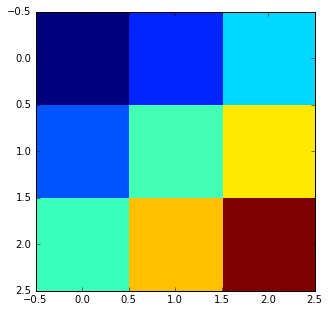

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# zi = griddata((y_dist,x_dist), gridz, (y_dist,x_dist), method='cubic')
# grid_bathy = ax.contour(y_dist,x_dist,zi)
# cbar = fig.colorbar(grid_bathy, ax=ax)

img = plt.imshow(gridz,interpolation='nearest',cmap='jet')

In [16]:
hsquare = h_2(i,j,bathy10,x10,y10)

[[       0.           180797.10327855   361594.20655711 ...,
   8497463.85409203  8678260.95737059  8859058.06064914]
 [       0.           180797.10327855   361594.20655711 ...,
   8497463.85409203  8678260.95737059  8859058.06064914]
 [       0.           180797.10327855   361594.20655711 ...,
   8497463.85409203  8678260.95737059  8859058.06064914]
 ..., 
 [       0.           180797.10327855   361594.20655711 ...,
   8497463.85409203  8678260.95737059  8859058.06064914]
 [       0.           180797.10327855   361594.20655711 ...,
   8497463.85409203  8678260.95737059  8859058.06064914]
 [       0.           180797.10327855   361594.20655711 ...,
   8497463.85409203  8678260.95737059  8859058.06064914]] [[        0.                 0.                 0.         ...,         0.
          0.                 0.        ]
 [   209458.14648691    209458.14648691    209458.14648691 ...,
     209458.14648691    209458.14648691    209458.14648691]
 [   418916.29297381    418916.29297381    4

In [20]:
# def h_2(i,j,bathy,ibcaox,ibcaoy):
#     #i,j are the gridpoints that hsquare will be calculated for. 
#     # bathy, ibcaox, and ibcaoy are the IBCAO variables from the arcsec file
#     if ma.is_masked(bathy[i,j]):
#         # If the grid point is masked - return masked element
#         return ma.masked_all(1)
#     data = data_grid(bathy,i,j,ibcaox,ibcaoy)
#     if np.isnan(data).any():
#         # If any bathy values are masked then delete the rows with the masked 
#         # element before plane fitting.
#         count = len(data[:,0])
#         row = 0
#         while row < count:
#             if np.isnan(data[row,2]):
#                 data = np.delete(data, (row), axis=0)
#                 count = count-1
#             else:
#                 row = row + 1
#     C = coeff(data,i,j)
#     h = 0
#     for index in np.arange(0,len(data[:,0])):
#         distance = (data[index,2] - (C[0]*data[index,0] + C[1]*data[index,1] + C[2]))**2
#         h = h + distance
#     hsquare = h/len(data[:,0])
#     return hsquare

# def data_grid(bathy,i,j,ibcaox,ibcaoy):
#     x,y = x_y(i,j,ibcaox,ibcaoy)
#     gridz = zgrid(bathy,i,j)
#     d = np.array([[y[0],x[0],gridz[2,0]],
#                [y[1],x[0],gridz[2,1]],
#                [y[2],x[0],gridz[2,2]],
#                [y[0],x[1],gridz[1,0]],
#                [y[0],x[2],gridz[0,0]],
#                [y[1],x[1],gridz[1,1]],
#                [y[1],x[2],gridz[0,1]],
#                [y[2],x[1],gridz[1,2]],
#                [y[2],x[2],gridz[0,2]]])
#     return d

# def zgrid(bathy,i,j):
#     #creates a grid of bathemitric values for the surrounding cells
#     gridz = np.array([[bathy[i-1,j+1],bathy[i,j+1],bathy[i+1,j+1]]
#                      ,[bathy[i-1,j  ],bathy[i,j  ],bathy[i+1,j  ]]
#                      ,[bathy[i-1,j-1],bathy[i,j-1],bathy[i+1,j-1]]])
#     return gridz

# def grid_dist(x_lon, y_lat, x_dist, y_dist):
#     start = (y_lat[0],x_lon[0])
#     for d in np.arange(1,len(y_lat)):
#         endy = (y_lat[d],x_lon[0])
#         y_dist[d] = vincenty(start,endy).meters
#     for d in np.arange(1,len(x_lon)):
#         endx = (y_lat[0],x_lon[d])
#         x_dist[d] = vincenty(start,endx).meters
#     return x_dist, y_dist

# def x_y(i,j,ibcaox,ibcaoy):
#     x_lon = np.array([ibcaox[j-1],ibcaox[j],ibcaox[j+1]])
#     y_lat = np.array([ibcaoy[i-1],ibcaoy[i],ibcaoy[i+1]])

#     x_dist = np.zeros_like(x_lon)
#     y_dist = np.zeros_like(y_lat)
    
#     x , y = grid_dist(x_lon, y_lat, x_dist, y_dist)
#     return x, y

# def coeff(data,i,j,order=1):
#     if order == 1:
#         # best-fit linear plane
#         A = np.c_[data[:,0], data[:,1], np.ones(data.shape[0])]
#         C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])    # coefficients

#     elif order == 2:
#         # best-fit quadratic curve
#         A = np.c_[np.ones(data.shape[0]), data[:,:2], np.prod(data[:,:2], axis=1), data[:,:2]**2]
#         C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])
     
#     return C




In [15]:
def h_2(i,j,bathy,ibcaox,ibcaoy):
    #i,j are the gridpoints that hsquare will be calculated for. 
    # bathy, ibcaox, and ibcaoy are the IBCAO variables from the arcsec file
    if ma.is_masked(bathy[i,j]):
        # If the grid point is masked - return masked element
        return ma.masked_all(1)
    data = data_grid(bathy,i,j,ibcaox,ibcaoy)
    if np.isnan(data).any():
        # If any bathy values are masked then delete the rows with the masked 
        # element before plane fitting.
        count = len(data[:,0])
        row = 0
        while row < count:
            if np.isnan(data[row,2]):
                data = np.delete(data, (row), axis=0)
                count = count-1
            else:
                row = row + 1
    C = coeff(data,i,j)
    mn = np.min(data, axis=0)
    mx = np.max(data, axis=0)
    X,Y = np.meshgrid(np.linspace(mn[0], mx[0]), np.linspace(mn[1], mx[1]))
    XX = X.flatten()
    YY = Y.flatten()
    Z = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2], C).reshape(X.shape)
    print(X,Y)
    h = 0
    for index in np.arange(0,len(data[:,0])):
        distance = (data[index,2] - (C[0]*data[index,0] + C[1]*data[index,1] + C[2]))**2
        h = h + distance
    hsquare = h/len(data[:,0])
    return hsquare

def data_grid(bathy,i,j,ibcaox,ibcaoy):
    x,y = x_y(i,j,ibcaox,ibcaoy)
    gridz = zgrid(bathy,i,j)
    d = np.array([[y[0],x[0],gridz[2,0]],
               [y[1],x[0],gridz[2,1]],
               [y[2],x[0],gridz[2,2]],
               [y[0],x[1],gridz[1,0]],
               [y[0],x[2],gridz[0,0]],
               [y[1],x[1],gridz[1,1]],
               [y[1],x[2],gridz[0,1]],
               [y[2],x[1],gridz[1,2]],
               [y[2],x[2],gridz[0,2]]])
    return d

def zgrid(bathy,i,j):
    #creates a grid of bathemitric values for the surrounding cells
    gridz = np.array([[bathy[i-1,j+1],bathy[i,j+1],bathy[i+1,j+1]]
                     ,[bathy[i-1,j  ],bathy[i,j  ],bathy[i+1,j  ]]
                     ,[bathy[i-1,j-1],bathy[i,j-1],bathy[i+1,j-1]]])
    return gridz

def grid_dist(x_lon, y_lat, x_dist, y_dist):
    start = (y_lat[0],x_lon[0])
    for d in np.arange(1,len(y_lat)):
        endy = (y_lat[d],x_lon[0])
        y_dist[d] = vincenty(start,endy).meters
    for d in np.arange(1,len(x_lon)):
        endx = (y_lat[0],x_lon[d])
        x_dist[d] = vincenty(start,endx).meters
    return x_dist, y_dist

def x_y(i,j,ibcaox,ibcaoy):
    x_lon = np.array([ibcaox[j-1],ibcaox[j],ibcaox[j+1]])
    y_lat = np.array([ibcaoy[i-1],ibcaoy[i],ibcaoy[i+1]])

    x_dist = np.zeros_like(x_lon)
    y_dist = np.zeros_like(y_lat)
    
    x , y = grid_dist(x_lon, y_lat, x_dist, y_dist)
    return x, y

def coeff(data,i,j,order=2):
    if order == 1:
        # best-fit linear plane
        A = np.c_[data[:,0], data[:,1], np.ones(data.shape[0])]
        C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])    # coefficients

    elif order == 2:
        # best-fit quadratic curve
        A = np.c_[np.ones(data.shape[0]), data[:,:2], np.prod(data[:,:2], axis=1), data[:,:2]**2]
        C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])
     
    return C


In [41]:
hsquare = np.zeros_like(bathy10)

i = np.arange(1,len(y10)-1)
j = np.arange(1,len(x10)-1)
# print(h_2(311,1,bathy10,x10,y10))
for ii in i:
    for jj in j:
        hsquare[ii,jj] = h_2(ii,jj,bathy10,x10,y10)
#save numpy array
hsquare.dump('hsquare_quad.npy')



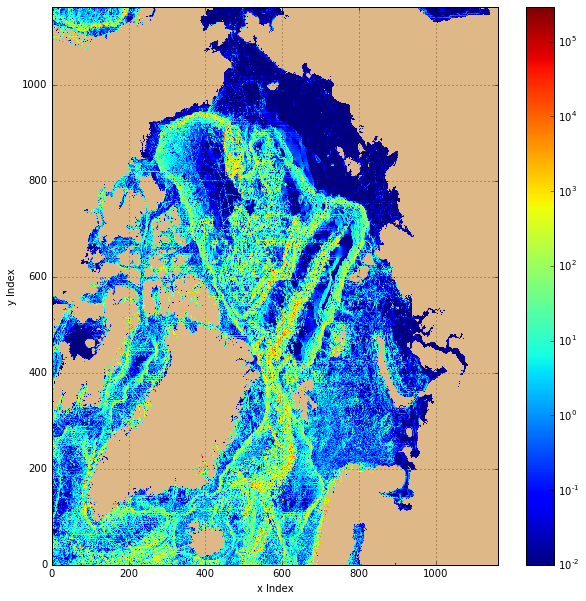

In [12]:
hsquare = np.load('/home/jacquielee/data/hsquare.npy')


fig, ax = plt.subplots(1, 1, figsize=(10, 10))
cmap = plt.get_cmap('jet')
cmap.set_bad('burlywood')
#x_lon, y_lat = np.meshgrid(x10[:], y10[:])
mesh = ax.pcolormesh(hsquare[::10,::10],cmap=cmap,norm=colors.LogNorm(vmin=0.01, vmax=hsquare.max()))
cbar = fig.colorbar(mesh,ax=ax)
plt.axis((0, hsquare[::10,::10].shape[1], 0, hsquare[::10,::10].shape[0]))
ax.grid()

ax.set_xlabel('x Index')
ax.set_ylabel('y Index')

In [20]:
ma.is_masked(hsquare)

i = np.arange(1,len(y10)-1)
j = np.arange(1,len(x10)-1)
for ii in i:
    for jj in j:
        if ma.is_masked(hsquare[ii,jj]):
            hsquare[ii,jj] = 0.0

The map above shows a lower resolution contour of h^2. 

# Apply to ANHA4
Now I will need to think about how these values will be applied to the AHNA4 grid. There are a few considerations:
    * efficient algorithm. What is the most efficient way to match the gridcells of AHNA4 to IBCAO?
    

In [8]:
grid = nc.Dataset('/home/jacquielee/data/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy_anha = grid.variables['Bathymetry'][:]
bathy_anha = ma.masked_values(bathy_anha[:],0.0)
lats_anha = np.array(grid.variables['nav_lat'])
lons_anha = np.array(grid.variables['nav_lon'])


Here, the coordinates for the nemo grid will be converted to polar stereographic projection to match with the IBCAO data. Then the hsquare data will be interpolated onto the ANHA4 grid and the coordinates will be changed back to lat/lon. The reason for this roun about interpolation is that the ANHA4 grid is irregular where as the IBCAO grid is regular, making triangulation to convert from polar stereographic to lat/lon not possible within this framework.

In [41]:
import pyproj

#input coordinates    
p1 = pyproj.Proj("+init=EPSG:4326",datum="WGS84", ellps="WGS84")

#output result
p2 = pyproj.Proj("+init=EPSG:3995")

anha_x, anha_y = pyproj.transform(p1, p2, lons_anha, lats_anha)
print(anha_x[1:5,0], anha_y[1,0])


[-17388647.98204063 -17313388.95942413 -17238458.03849776 -17163852.0620638 ] 2521233.96689


(0, 544, 0, 800)

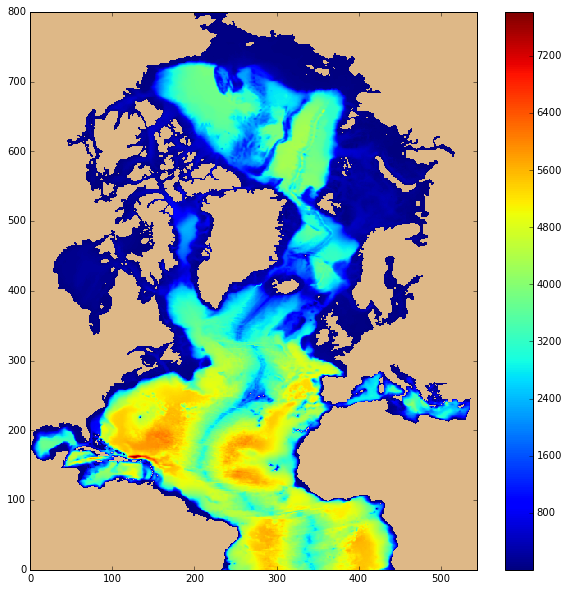

In [37]:
fig, axes = plt.subplots(1, 1, figsize=(10, 10))

cmap = plt.get_cmap('jet')
cmap.set_bad('burlywood')
mesh = axes.pcolormesh(bathy_anha[:,:],cmap=cmap)
cbar = fig.colorbar(mesh,ax=axes)
plt.axis((0, ANHAh.shape[1], 0, ANHAh.shape[0]))

In [42]:
from mpl_toolkits import basemap
ANHAh1 = basemap.interp(hsquare,x10,y10,anha_x, anha_y,masked = 0)

ANHAh0 = basemap.interp(hsquare,x10,y10,anha_x, anha_y,masked=0 ,order=0)


In [43]:
mask0 = (ma.getmaskarray(ANHAh0))*1
mask1 = (ma.getmaskarray(ANHAh1))*1
ANHAh = np.zeros_like(ANHAh1,dtype=float)

for i in np.arange(0,ANHAh1[:,0].shape[0]):
    for j in np.arange(0,ANHAh1[0,:].shape[0]):
        if mask0[i,j] == mask1[i,j]:
            ANHAh[i,j] = ANHAh1[i,j]
        else:
            ANHAh[i,j] = ANHAh0[i,j]
            

In [50]:
ANHAh=np.ma.masked_where(ANHAh == 0.0,ANHAh)

In [54]:
 ANHAh.dump('/home/jacquielee/data/hsquare_IBCAO_linear.npy')

In [6]:
ANHAh = np.load('/mnt/storage0/jacquielee/data/hsquare_IBCAO_linear.npy')

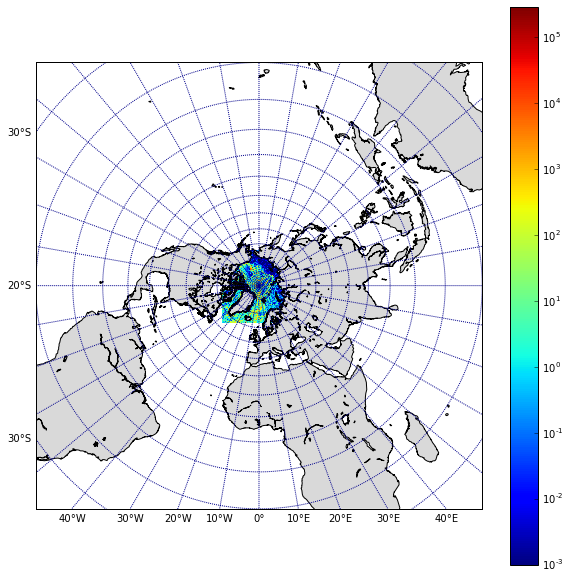

In [9]:
fig, axes = plt.subplots(1, 1, figsize=(10, 10))

m = Basemap(projection='npstere',boundinglat=-20,lon_0=0,resolution='l',round=False, ax=axes)
m.drawcoastlines()
m.fillcontinents(color = '0.85')
cmap = plt.get_cmap('jet')
cmap.set_bad('burlywood')
m.drawparallels(np.arange(-80.,90.,10.),labels=[1, 0, 0, 0],color='darkblue',latmax=90)
m.drawmeridians(np.arange(-180.,180.,10.),labels=[0, 0, 0, 1],color='darkblue',latmax=90)
#x_lon, y_lat = m(x[:,],y[:,])
#x_lon, y_lat = np.meshgrid(lons_anha[::10], lats_anha[::10])
X,Y = m(lons_anha, lats_anha)
#cant plot full resolution due to memory constraints
m = m.pcolor(X,Y,ANHAh, norm=colors.LogNorm(vmin=0.001, vmax=hsquare.max()),cmap=cmap)
cbar = fig.colorbar(m,ax=axes)


(0, 544, 0, 800)

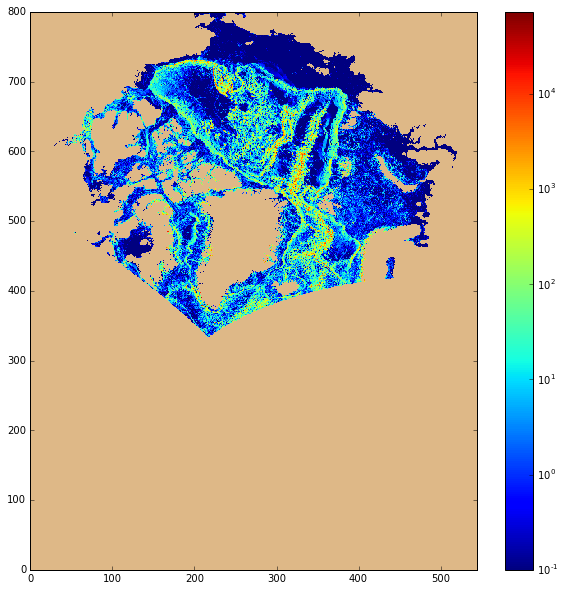

In [10]:
fig, axes = plt.subplots(1, 1, figsize=(10, 10))

cmap = plt.get_cmap('jet')
cmap.set_bad('burlywood')
mesh = axes.pcolormesh(ANHAh[:,:],norm=colors.LogNorm(vmin=0.1, vmax=ANHAh.max()),cmap=cmap)
cbar = fig.colorbar(mesh,ax=axes)
plt.axis((0, ANHAh.shape[1], 0, ANHAh.shape[0]))

In [11]:
ANHAh.min()

4.8148248609680896e-35